#### Libraries

In [2]:
import yfinance as yfinance
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")
import numpy as np

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR, VARMAX

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import grangercausalitytests

### Univariate

#### Loading Univariate Data

In [3]:
stock_data = yfinance.download('AAPL', start='2023-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.768448,129.537772,122.877812,128.924229,112117500
2023-01-04,125.045044,127.321112,123.778365,125.569527,89113600
2023-01-05,123.718971,126.440353,123.461682,125.807014,80962700
2023-01-06,128.271118,128.934144,123.590345,124.698692,87754700
2023-01-09,128.795593,132.021678,128.538304,129.112270,70790800


#### Checking Stationarity

False
False


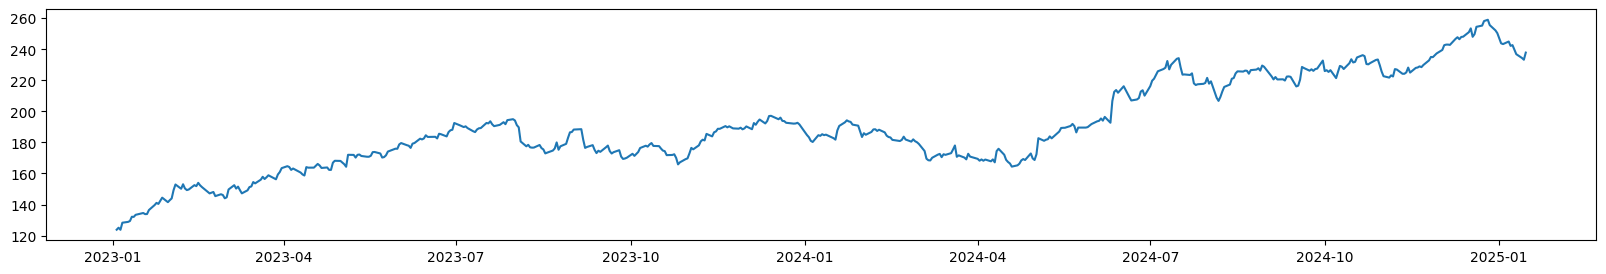

In [4]:
plt.figure(figsize=(20, 3))
plt.plot(stock_data['Close'])
print(adfuller(stock_data['Close'])[1]<0.05)
print(kpss(stock_data['Close'], regression='ct')[1]>0.05)

#### Making it Stationary

In [5]:
apple_price_stationary = stock_data['Close'].diff().diff().dropna()

True
True


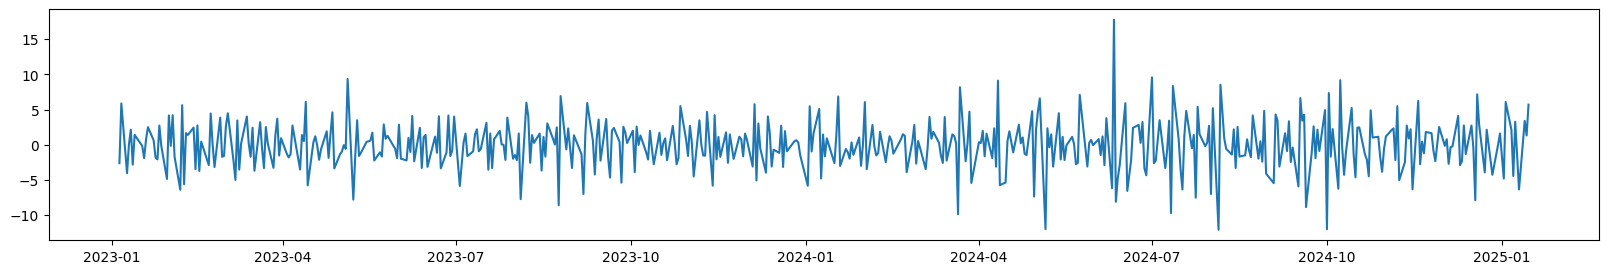

In [6]:
plt.figure(figsize=(20, 3))
plt.plot(apple_price_stationary)
print(adfuller(apple_price_stationary)[1]<0.05)
print(kpss(apple_price_stationary, regression='ct')[1]>0.05)

#### ACF and PACF

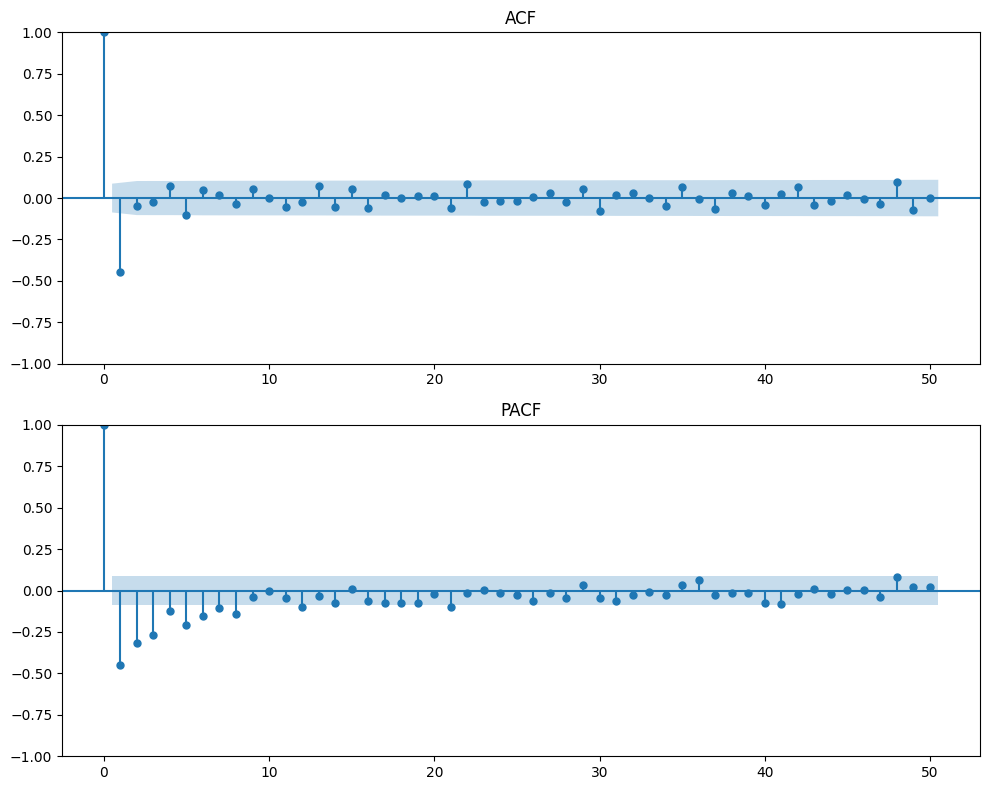

In [7]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plot_acf(apple_price_stationary, ax=plt.gca(), lags=50)
plt.title('ACF')

plt.subplot(2, 1, 2)
plot_pacf(apple_price_stationary, ax=plt.gca(), lags=50)
plt.title('PACF')

plt.tight_layout()
plt.show()

#### Splitting the data

In [8]:
train_data, test_data = apple_price_stationary[:int(len(apple_price_stationary)*0.9)], apple_price_stationary[int(len(apple_price_stationary)*0.9):]
# train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

In [9]:
len(train_data), len(test_data)

(458, 51)

#### AR Model

In [10]:
AR_model = AutoReg(train_data, lags=30)
AR_model_fit = AR_model.fit()

In [11]:
AR_predictions = AR_model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

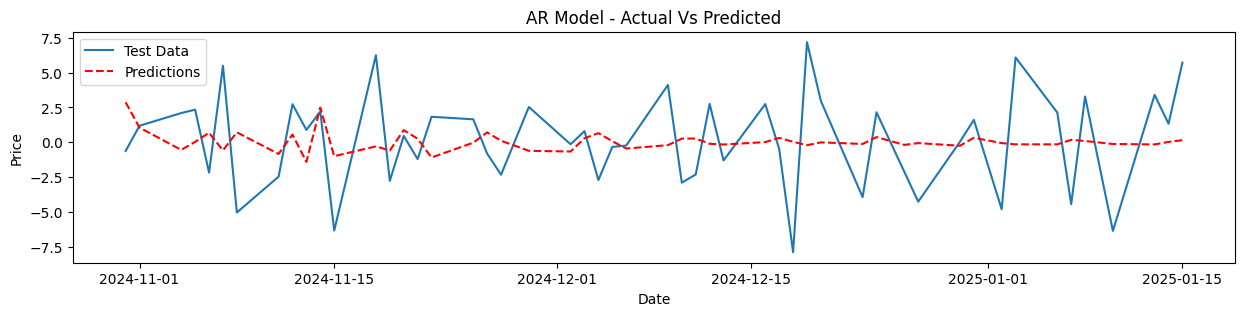

In [12]:
plt.figure(figsize=(15, 3))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, AR_predictions, color='red', linestyle = '--', label='Predictions')
plt.title('AR Model - Actual Vs Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [13]:
rmse = round(np.sqrt(mean_squared_error(test_data, AR_predictions)), 2)
print('RMSE : ', rmse)

RMSE :  3.53


In [16]:
AR_model_fit.aic, AR_model_fit.bic

(np.float64(2071.4173463714787), np.float64(2201.309288630096))

#### MA Model

In [15]:
MA_model = ARIMA(train_data, order = (0, 0, 30))
MA_model_fit = MA_model.fit()

KeyboardInterrupt: 

In [13]:
MA_predictions = MA_model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

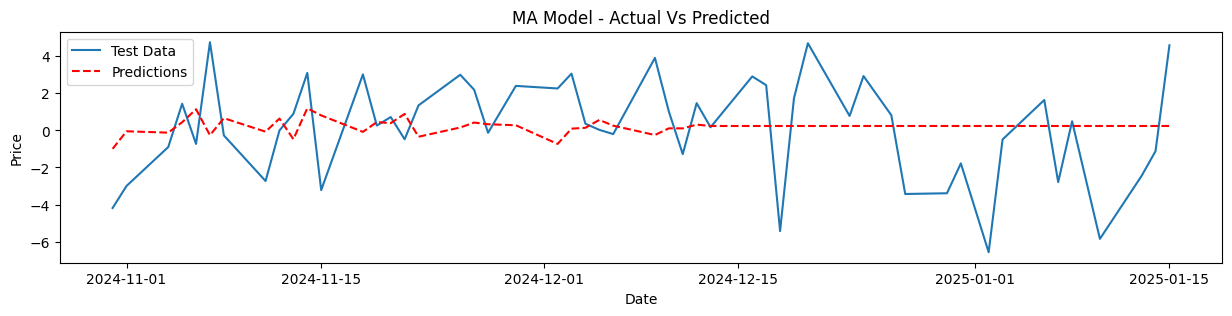

In [14]:
plt.figure(figsize=(15, 3))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, MA_predictions, color='red', linestyle = '--', label='Predictions')
plt.title('MA Model - Actual Vs Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [15]:
rmse = round(np.sqrt(mean_squared_error(test_data, MA_predictions)), 2)
print('RMSE : ', rmse)

RMSE :  2.72


#### ARMA Model

In [23]:
ARMA_model = ARIMA(train_data, order = (8, 0, 1))
ARMA_model_fit = ARMA_model.fit()

In [24]:
ARMA_predictions = ARMA_model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

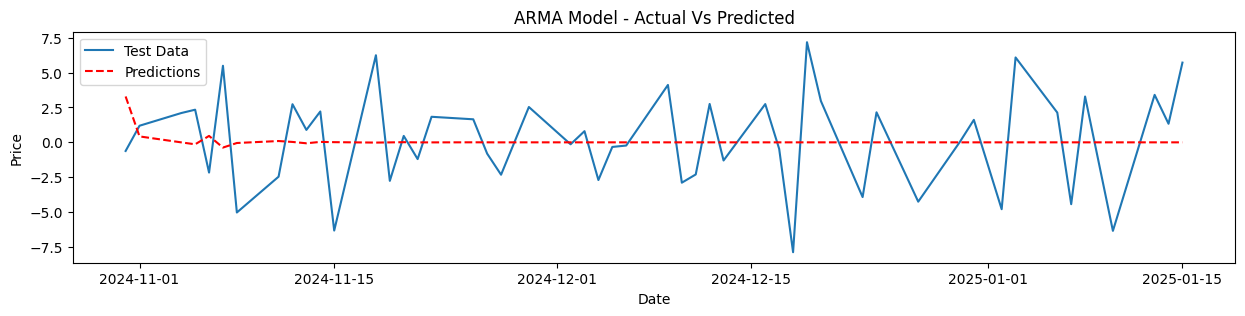

In [25]:
plt.figure(figsize=(15, 3))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, ARMA_predictions, color='red', linestyle = '--', label='Predictions')
plt.title('ARMA Model - Actual Vs Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [26]:
rmse = round(np.sqrt(mean_squared_error(test_data, ARMA_predictions)), 2)
print('RMSE : ', rmse)

RMSE :  3.49


In [27]:
ARMA_model_fit.aic, ARMA_model_fit.bic

(np.float64(2176.5147357147375), np.float64(2221.9102967399936))

#### ARIMA Model

In [17]:
ARIMA_model = ARIMA(train_data, order = (8, 2, 1))
ARIMA_model_fit = ARIMA_model.fit()

In [18]:
ARIMA_predictions = ARIMA_model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

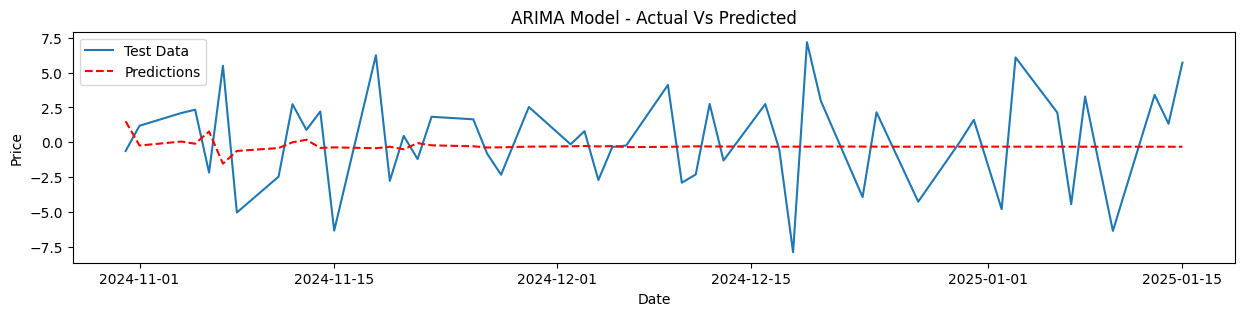

In [19]:
plt.figure(figsize=(15, 3))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, ARIMA_predictions, color='red', linestyle = '--', label='Predictions')
plt.title('ARIMA Model - Actual Vs Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [21]:
rmse = round(np.sqrt(mean_squared_error(test_data, ARIMA_predictions)), 2)
print('RMSE : ', rmse)

RMSE :  3.51


In [22]:
ARIMA_model_fit.aic, ARIMA_model_fit.bic

(np.float64(2352.4009918690576), np.float64(2393.6259199642013))

#### SARIMA model

In [ ]:
SARIMAX_model = SARIMAX(train_data, order = (30, 1, 30), seasonal_order=(1,1,1,45))
SARIMAX_model_fit = SARIMAX_model.fit()

In [31]:
SARIMAX_predictions = SARIMAX_model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

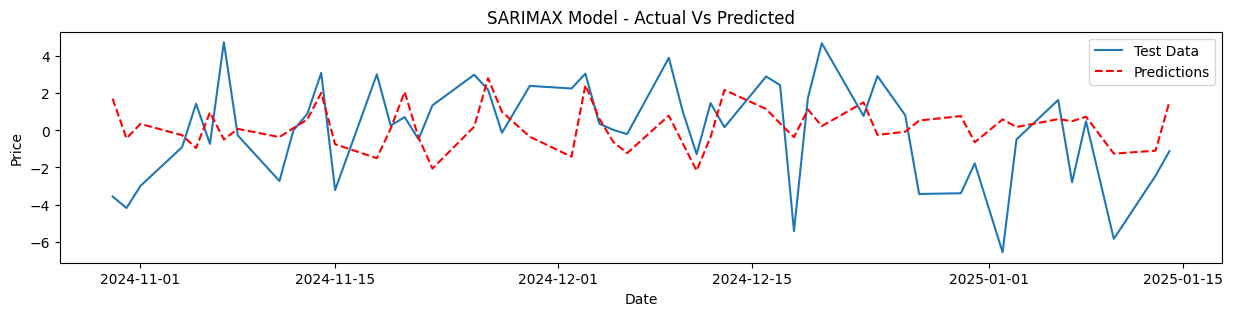

In [32]:
plt.figure(figsize=(15, 3))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, SARIMAX_predictions, color='red', linestyle = '--', label='Predictions')
plt.title('SARIMAX Model - Actual Vs Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [33]:
rmse = round(np.sqrt(mean_squared_error(test_data, SARIMAX_predictions)), 2)
print('RMSE : ', rmse)

RMSE :  2.74


### Multivariate

#### Loading Multivariate Data

In [43]:
tsla_data = yfinance.download('TSLA', start='2023-01-01')
stock_data['TSLA_Close'] = tsla_data['Close']
stock_data['AAPL_Close'] = stock_data['Close'].shift()
stock_data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


#### Granger Causality Test

In [47]:
grangercausalitytests(stock_data[['AAPL_Close', 'TSLA_Close']].dropna(), maxlag=14)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4056  , p=0.5245  , df_denom=505, df_num=1
ssr based chi2 test:   chi2=0.4080  , p=0.5230  , df=1
likelihood ratio test: chi2=0.4078  , p=0.5231  , df=1
parameter F test:         F=0.4056  , p=0.5245  , df_denom=505, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=34.9324 , p=0.0000  , df_denom=502, df_num=2
ssr based chi2 test:   chi2=70.5608 , p=0.0000  , df=2
likelihood ratio test: chi2=66.0634 , p=0.0000  , df=2
parameter F test:         F=34.9324 , p=0.0000  , df_denom=502, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=23.4390 , p=0.0000  , df_denom=499, df_num=3
ssr based chi2 test:   chi2=71.3034 , p=0.0000  , df=3
likelihood ratio test: chi2=66.7067 , p=0.0000  , df=3
parameter F test:         F=23.4390 , p=0.0000  , df_denom=499, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=17.6770 , p=0.0000  

{np.int64(1): ({'ssr_ftest': (np.float64(0.4055882498056298),
    np.float64(0.5245058509111482),
    np.float64(505.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.40799768495299),
    np.float64(0.5229875548656522),
    np.int64(1)),
   'lrtest': (np.float64(0.4078339319648876),
    np.float64(0.5230709683459358),
    np.int64(1)),
   'params_ftest': (np.float64(0.4055882498054672),
    np.float64(0.5245058509112344),
    np.float64(505.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(34.932447561525386),
    np.float64(6.251441864857804e-15),
    np.float64(502.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(70.56076061232419),
    np.float64(4.763492805109957e-16),
    np.int64(2)),
   'lrtest': (np.float64(66.06344175104277),
    np.float64(4.513421527315738e-15),
    np.int64(2)),
   'params_ftest': (np.float64(34.93244756152407),
    np.float64(6.251441864864956e-15),
    np.float64(502.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],

#### Splitting the vector data

In [50]:
data = stock_data[['AAPL_Close', 'TSLA_Close']].diff().dropna()
vec_train_data, vec_test_data = data[:int(len(data)*0.9)], data[int(len(data)*0.9):]

#### VAR model

In [53]:
VAR_model = VAR(vec_train_data)
VAR_model_fit = VAR_model.fit(maxlags=30)

In [54]:
VAR_predictions = VAR_model_fit.forecast(vec_train_data.values, steps=len(vec_test_data))

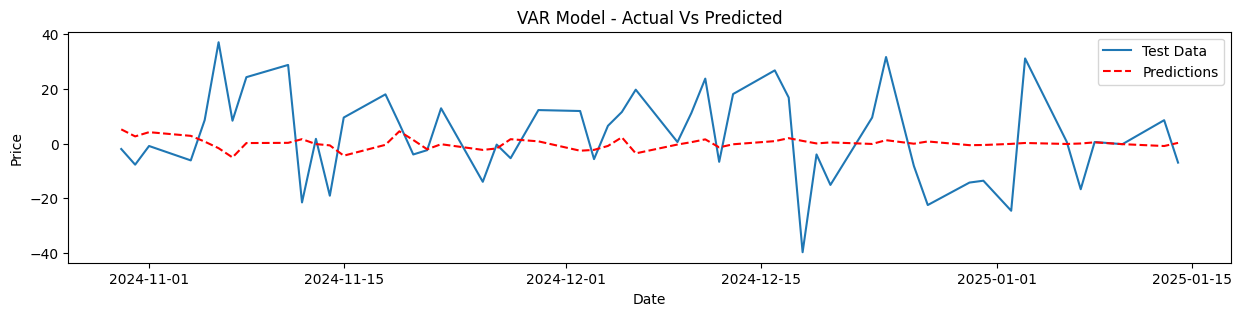

In [63]:
plt.figure(figsize=(15, 3))
plt.plot(vec_test_data.index, vec_test_data['TSLA_Close'], label='Test Data')
plt.plot(vec_test_data.index, VAR_predictions[:, 1], color='red', linestyle = '--', label='Predictions')
plt.title('VAR Model - Actual Vs Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [64]:
rmse = round(np.sqrt(mean_squared_error(vec_test_data['TSLA_Close'], VAR_predictions[:, 1])), 2)
print('RMSE : ', rmse)

RMSE :  16.56


#### VMA model

In [83]:
VMA_model = VARMAX(vec_train_data, order=(0, 7))
VMA_model_fit = VMA_model.fit()

In [84]:
VMA_predictions = VMA_model_fit.forecast(steps=len(vec_test_data))

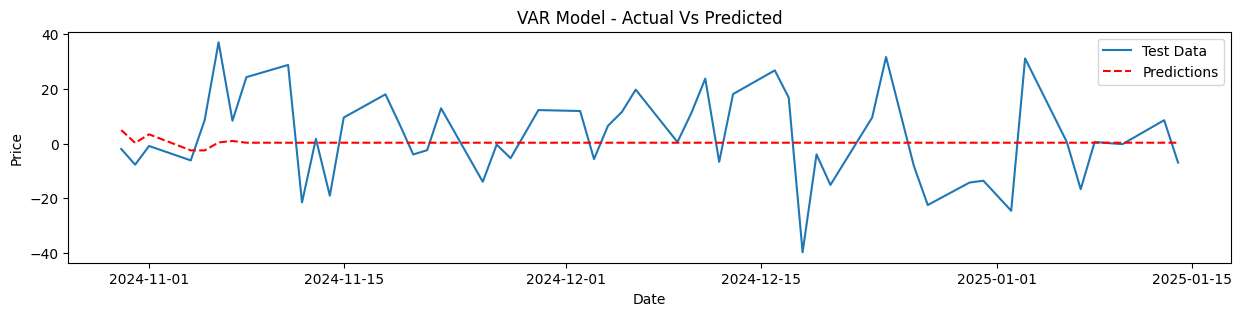

In [85]:
plt.figure(figsize=(15, 3))
plt.plot(vec_test_data.index, vec_test_data['TSLA_Close'], label='Test Data')
plt.plot(vec_test_data.index, VMA_predictions['TSLA_Close'], color='red', linestyle = '--', label='Predictions')
plt.title('VMA Model - Actual Vs Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [86]:
rmse = round(np.sqrt(mean_squared_error(vec_test_data['TSLA_Close'], VMA_predictions['TSLA_Close'])), 2)
print('RMSE : ', rmse)

RMSE :  16.29


#### VARMA model

In [87]:
VARMA_model = VARMAX(vec_train_data, order=(7, 7))
VARMA_model_fit = VARMA_model.fit()

In [88]:
VARMA_predictions = VARMA_model_fit.forecast(steps=len(vec_test_data))

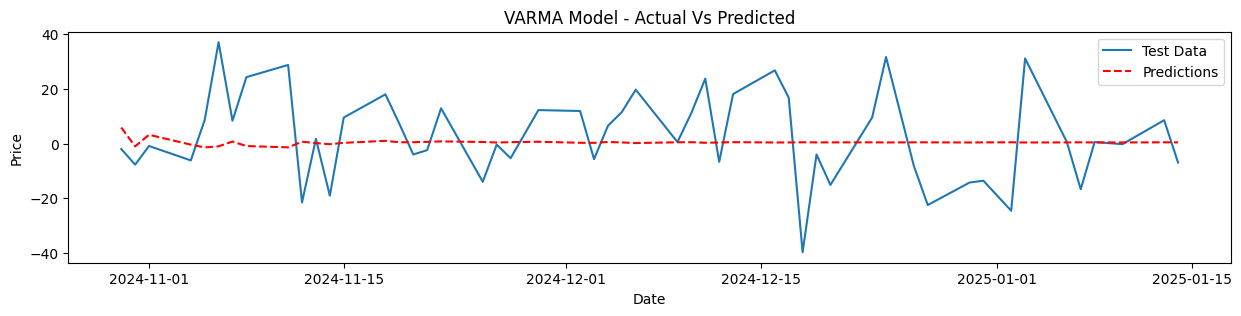

In [89]:
plt.figure(figsize=(15, 3))
plt.plot(vec_test_data.index, vec_test_data['TSLA_Close'], label='Test Data')
plt.plot(vec_test_data.index, VARMA_predictions['TSLA_Close'], color='red', linestyle = '--', label='Predictions')
plt.title('VARMA Model - Actual Vs Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [90]:
rmse = round(np.sqrt(mean_squared_error(vec_test_data['TSLA_Close'], VARMA_predictions['TSLA_Close'])), 2)
print('RMSE : ', rmse)

RMSE :  16.44
